In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
data= pd.read_csv("C:\\Users\\USER\\Desktop\\Python\\AdvancePython\\Statistics\\Machine Learning (Codes and Data Files)\\Data\\bollywood.csv")

In [6]:
data.head()

,SlNo,Release Date,MovieName,ReleaseTime,Genre,Budget,BoxOfficeCollection,YoutubeViews,YoutubeLikes,YoutubeDislikes
0,1,18-Apr-14,2 States,LW,Romance,36,104.00,8576361,26622,2527
1,2,4-Jan-13,Table No. 21,N,Thriller,10,12.00,1087320,1129,137
2,3,18-Jul-14,Amit Sahni Ki List,N,Comedy,10,4.00,572336,586,54
3,4,4-Jan-13,Rajdhani Express,N,Drama,7,0.35,42626,86,19
4,5,4-Jul-14,Bobby Jasoos,N,Comedy,18,10.80,3113427,4512,1224


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   SlNo                 149 non-null    int64  
 1   Release Date         149 non-null    object 
 2   MovieName            149 non-null    object 
 3   ReleaseTime          149 non-null    object 
 4   Genre                149 non-null    object 
 5   Budget               149 non-null    int64  
 6   BoxOfficeCollection  149 non-null    float64
 7   YoutubeViews         149 non-null    int64  
 8   YoutubeLikes         149 non-null    int64  
 9   YoutubeDislikes      149 non-null    int64  
dtypes: float64(1), int64(5), object(4)
memory usage: 11.8+ KB


In [32]:
data['Genre']=data['Genre'].map(lambda x: x.strip())
data['Genre'].unique()

array(['Romance', 'Thriller', 'Comedy', 'Drama', 'Action'], dtype=object)

In [42]:
#movies in each genre
movie_per_genre = data.groupby('Genre',sort=True)['MovieName'].count().reset_index()

type(movie_per_genre)

pandas.core.frame.DataFrame

In [47]:
movie_per_genre.rename(columns={"MovieName":"MovieCount"},inplace=True)
movie_per_genre.sort_values(by='MovieCount',inplace=True)

<AxesSubplot:xlabel='Genre', ylabel='MovieCount'>

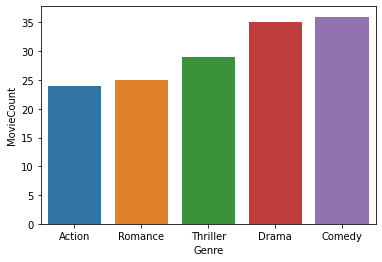

In [48]:
#plot
sns.barplot(x=movie_per_genre['Genre'],
            y=movie_per_genre['MovieCount']
           )

Comedy has the highest number of releases.

In [52]:
movie_per_genre_per_releaseTime = data.groupby(by=['Genre','ReleaseTime'])["MovieName"].count().reset_index()
movie_per_genre_per_releaseTime

,Genre,ReleaseTime,MovieName
0,Action,FS,3
1,Action,HS,3
2,Action,LW,3
3,Action,N,15
4,Comedy,FS,3
5,Comedy,HS,5
6,Comedy,LW,5
7,Comedy,N,23
8,Drama,FS,4
9,Drama,HS,6


In [56]:
pd.crosstab(data['Genre'],data['ReleaseTime'])

ReleaseTime,FS,HS,LW,N
Genre,,,,
Action,3,3,3,15
Comedy,3,5,5,23
Drama,4,6,1,24
Romance,3,3,4,15
Thriller,4,1,2,22


Most of the movies were released in Normal realese time

In [81]:
def getmonth(x):
    strt=x.index('-')+1
    x=x[strt:]
    end = x.index('-')
    return x[:end]

getmonth('7-mar-15')

'mar'

In [84]:

data['Release Month'] = data['Release Date'].apply(lambda x: getmonth(x))
data.head()

,SlNo,Release Date,MovieName,ReleaseTime,Genre,Budget,BoxOfficeCollection,YoutubeViews,YoutubeLikes,YoutubeDislikes,Release Month
0,1,18-Apr-14,2 States,LW,Romance,36,104.00,8576361,26622,2527,Apr
1,2,4-Jan-13,Table No. 21,N,Thriller,10,12.00,1087320,1129,137,Jan
2,3,18-Jul-14,Amit Sahni Ki List,N,Comedy,10,4.00,572336,586,54,Jul
3,4,4-Jan-13,Rajdhani Express,N,Drama,7,0.35,42626,86,19,Jan
4,5,4-Jul-14,Bobby Jasoos,N,Comedy,18,10.80,3113427,4512,1224,Jul


In [91]:
movies_month = data.groupby(by='Release Month')['MovieName'].count().reset_index()
movies_month.sort_values(by='MovieName')

,Release Month,MovieName
2,Dec,2
1,Aug,8
10,Oct,9
6,Jun,10
9,Nov,10
11,Sep,10
0,Apr,11
3,Feb,16
5,Jul,16
8,May,18


Most moview are released in january evry year.

In [103]:
movie_budget = data[['Release Month','Budget']].reset_index()
movie_budget=movie_budget[movie_budget['Budget']>25].sort_values(by='Release Month')
movie_budget.groupby(by='Release Month',sort=True).count().sort_values(by='Budget')

,index,Budget
Release Month,,
Dec,2,2
May,3,3
Apr,4,4
Oct,4,4
Sep,4,4
Jun,5,5
Jan,6,6
Jul,6,6
Mar,6,6


Most high budgeted movies are released in th mon5th of feb

In [111]:
data['ROI'] = ((data['BoxOfficeCollection']-data['Budget'])/data['Budget'] )
data.sort_values('ROI',ascending=False).head(10)

,SlNo,Release Date,MovieName,ReleaseTime,Genre,Budget,BoxOfficeCollection,YoutubeViews,YoutubeLikes,YoutubeDislikes,Release Month,ROI
64,65,26-Apr-13,Aashiqui 2,N,Romance,12,110.0,2926673,4944,628,Apr,8.166667
89,90,19-Dec-14,PK,HS,Drama,85,735.0,13270623,43767,5693,Dec,7.647059
132,133,13-Sep-13,Grand Masti,LW,Comedy,35,298.0,1795640,3015,721,Sep,7.514286
135,136,20-Sep-13,The Lunchbox,N,Drama,10,85.0,1064854,4054,285,Sep,7.500000
87,88,14-Jun-13,Fukrey,N,Comedy,5,36.2,227912,222,39,Jun,6.240000
58,59,5-Sep-14,Mary Kom,N,Drama,15,104.0,6086811,26560,1647,Sep,5.933333
128,129,18-Oct-13,Shahid,FS,Drama,6,40.0,1148516,3155,396,Oct,5.666667
37,38,11-Jul-14,Humpty Sharma Ki Dulhania,N,Romance,20,130.0,6604595,14535,2208,Jul,5.500000
101,102,12-Jul-13,Bhaag Milkha Bhaag,N,Drama,30,164.0,2635390,4622,456,Jul,4.466667
115,116,9-Aug-13,Chennai Express,FS,Comedy,75,395.0,1882346,7954,1593,Aug,4.266667


In [117]:
data_ROI_ReleaseTime = data.groupby('ReleaseTime')['ROI'].mean()
data_ROI_ReleaseTime

ReleaseTime
FS    0.973853
HS    0.850867
LW    1.127205
N     0.657722
Name: ROI, dtype: float64

Most of the movies released in Long Weekends have high ROIs

In [130]:
data[data['ReleaseTime']=='LW']['ROI'].mean()

1.1272053098737973

C:\Users\USER\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

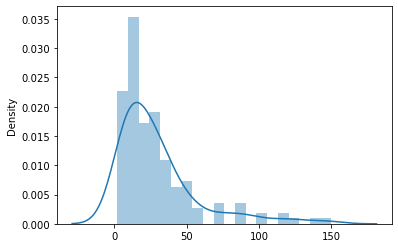

In [134]:
sns.distplot(x=data['Budget'],bins=20)

<AxesSubplot:xlabel='Budget', ylabel='Count'>

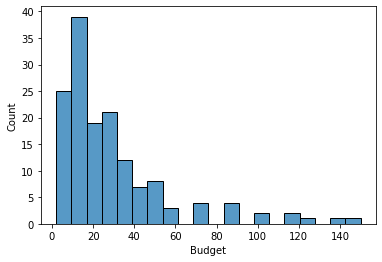

In [135]:
sns.histplot(x=data['Budget'],bins=20)

In [ ]:
It Looks like most of the movies are Low budgeted movies thts less than 20.

In [138]:
comedy=data[data['Genre']=='Comedy']
comedy

,SlNo,Release Date,MovieName,ReleaseTime,Genre,Budget,BoxOfficeCollection,YoutubeViews,YoutubeLikes,YoutubeDislikes,Release Month,ROI
2,3,18-Jul-14,Amit Sahni Ki List,N,Comedy,10,4.00,572336,586,54,Jul,-0.600000
4,5,4-Jul-14,Bobby Jasoos,N,Comedy,18,10.80,3113427,4512,1224,Jul,-0.400000
6,7,19-Sep-14,Daawat-E-Ishq,N,Comedy,30,24.60,3905050,8315,1373,Sep,-0.180000
7,8,11-Jan-13,Matru Ki Bijlee Ka Mandola,N,Comedy,33,40.00,2435283,4326,647,Jan,0.212121
8,9,10-Jan-14,Dedh Ishqiya,LW,Comedy,31,27.00,2333067,2436,591,Jan,-0.129032
14,15,8-Aug-14,Entertainment,N,Comedy,60,163.00,6336058,20472,2843,Aug,1.716667
17,18,6-Jun-14,Filmistaan,HS,Comedy,10,6.00,989096,1608,173,Jun,-0.400000
18,19,12-Sep-14,Finding Fanny,N,Comedy,15,58.90,6144142,13013,2746,Sep,2.926667
19,20,13-Jun-14,Fugly,HS,Comedy,10,12.60,2343109,2963,556,Jun,0.260000
39,40,20-Jun-14,Humshakals,HS,Comedy,75,63.70,6280868,1,1,Jun,-0.150667


C:\Users\USER\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\USER\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


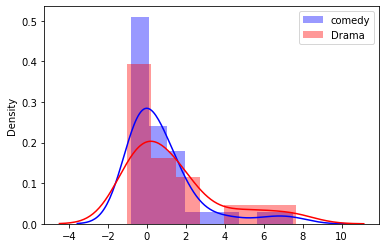

In [144]:
sns.distplot(x= comedy['ROI'],color='b',label='comedy')
sns.distplot(x= data[data['Genre']=='Drama']['ROI'],color='r',label='Drama')
plt.legend()

In [145]:
data[data['Genre']=='Comedy']['ROI'].mean()

0.7883937023544075

In [146]:
data[data['Genre']=='Drama']['ROI'].mean()

1.3574554352126598

We can conclude that Drama genre has more ROI when compared with Comedy

In [152]:
data_ROI_rel = data[['BoxOfficeCollection','YoutubeLikes','YoutubeDislikes','YoutubeViews']].corr()
data_ROI_rel

,BoxOfficeCollection,YoutubeLikes,YoutubeDislikes,YoutubeViews
BoxOfficeCollection,1.000000,0.682517,0.623941,0.588632
YoutubeLikes,0.682517,1.000000,0.859730,0.884055
YoutubeDislikes,0.623941,0.859730,1.000000,0.846739
YoutubeViews,0.588632,0.884055,0.846739,1.000000


<AxesSubplot:xlabel='Genre', ylabel='YoutubeLikes'>

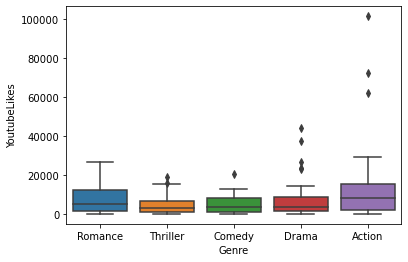

In [160]:

sns.boxplot(y=data['YoutubeLikes'],x=data['Genre'])

Action movies are tend to get more youtube likes

In [161]:
data_corr = data[['BoxOfficeCollection','YoutubeLikes','YoutubeDislikes','YoutubeViews','Budget']].corr()

<AxesSubplot:>

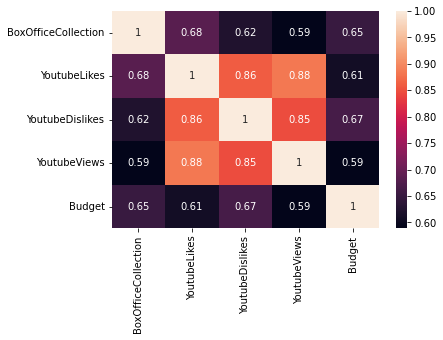

In [163]:
sns.heatmap(data_corr,annot=True)